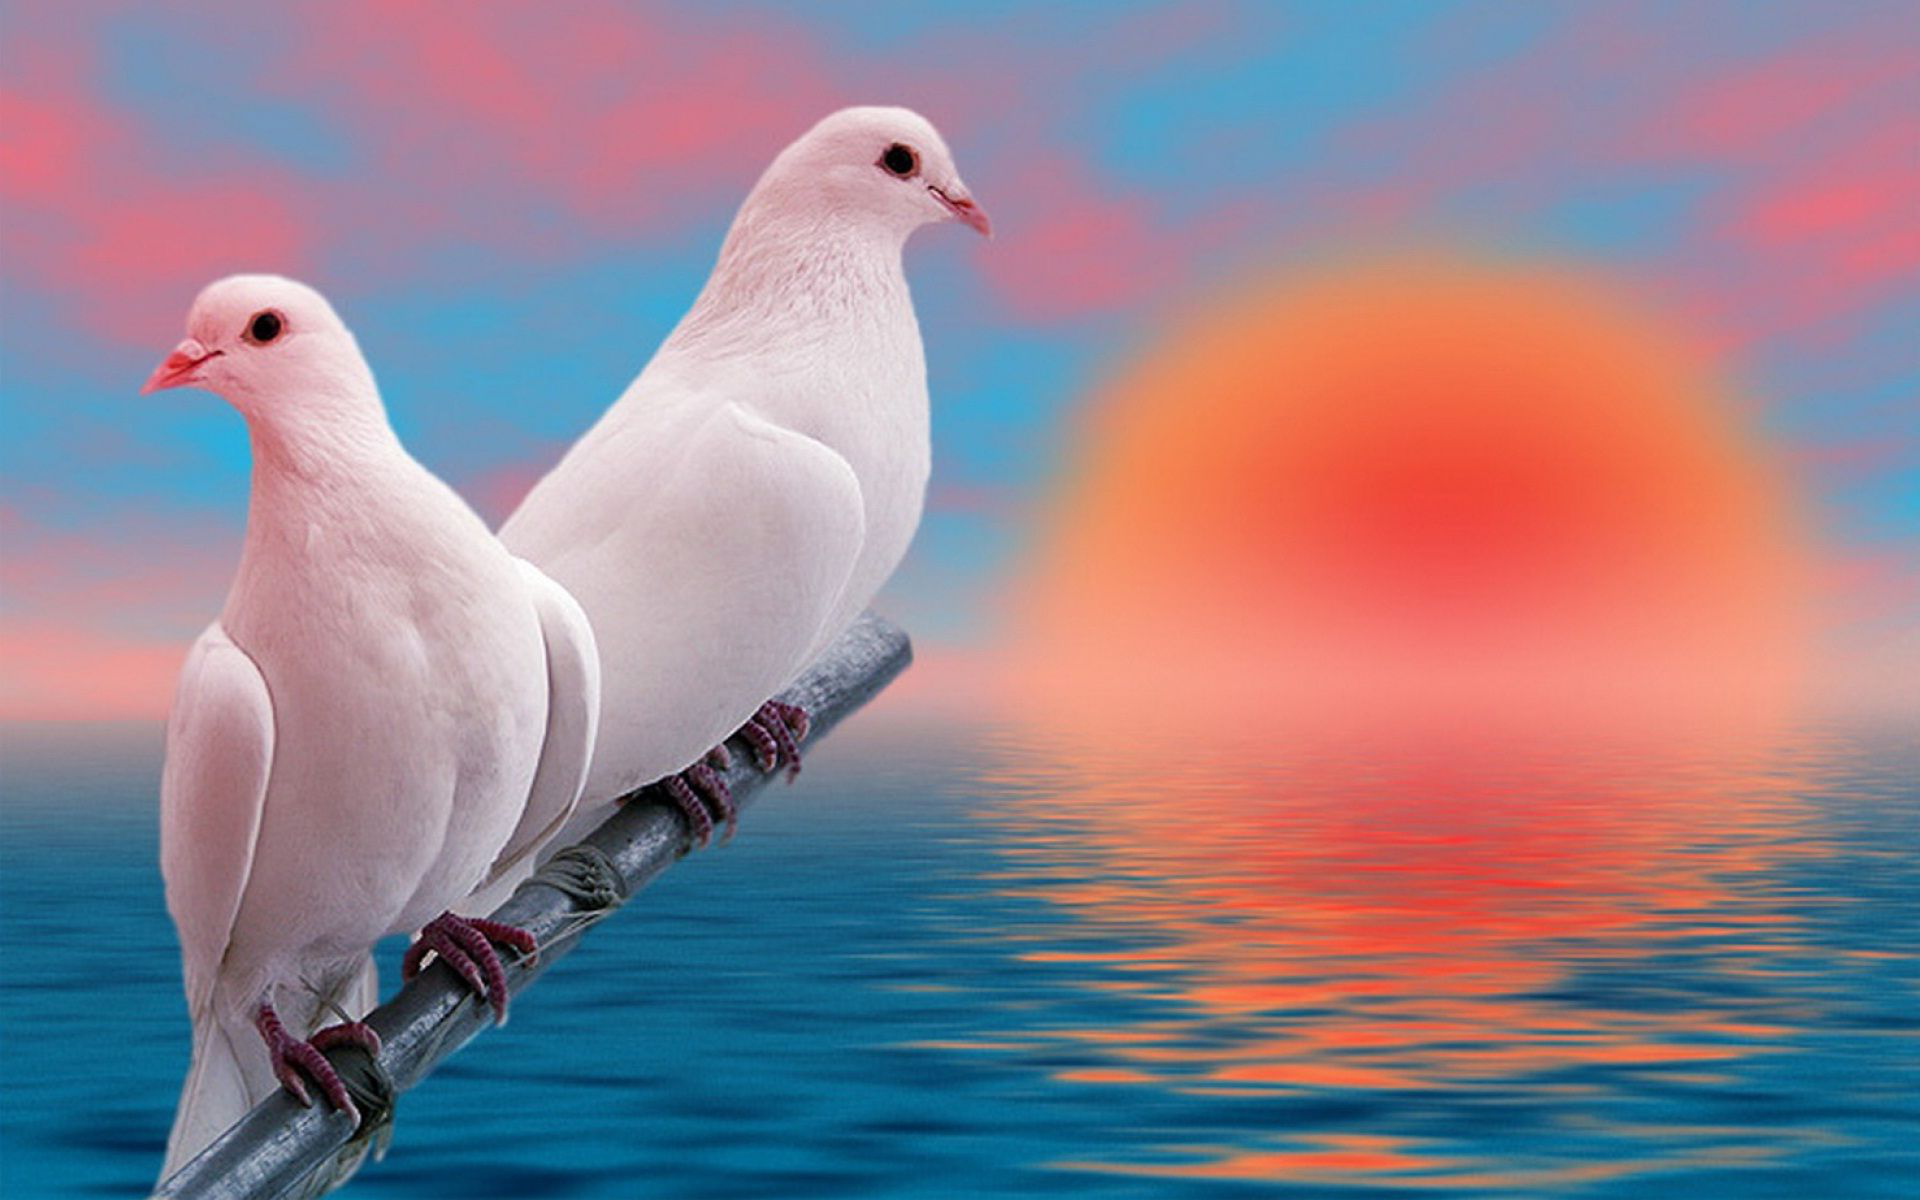

In [195]:
import glob, os
import math
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import PSDraw
from PIL import ImageFilter
from IPython.display import display
 

im = Image.open("img3.jpg")
#im2 = Image.open("img2.jpg")
box = (0, 0, 1920, 1200)
im2 = im2.crop(box)
display(im)


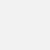

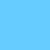

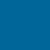

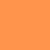

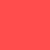

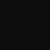

In [196]:
target_colors = [(242, 242, 242), (102, 204, 255), (0, 102, 153), (255, 148, 77), (255, 77, 77), (13, 13, 13)]
for color in target_colors:
    tmp_im = Image.new("RGB", (50, 50), color)
    display(tmp_im)


In [198]:
def pix_distance(x, y):
    return (pow((x[0]-y[0]), 2) + pow((x[1]-y[1]), 2) + pow((x[2]-y[2]), 2))

def find_proper_pixel(pixel, target_pixels):
    dist = []
    for pix in target_pixels:
        dist.append(pix_distance(pixel, pix))
    return dist.index(min(dist))

def split_img_in_colors(im, target_colors): 
    data = im.getdata()
    out_data = [];
    max_pix = 0
    for pixel in data:
        max_pix = target_colors[find_proper_pixel(pixel, target_colors)]
        out_data.append(max_pix)
    out = Image.new("RGB", im.size)
    out.putdata(out_data)
    return out

out = split_img_in_colors(im, target_colors)

In [204]:
out.show()
out.save("first.jpg", "JPEG")
out.save
im2 = out.filter(ImageFilter.ModeFilter(20))
im2.show()


In [205]:
im2.save("second.jpg", "JPEG")
out1 = im2.filter(ImageFilter.FIND_EDGES)

In [206]:
out1.show()
out1.save("edges.jpg", "JPEG")

In [25]:
enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")